In [288]:
import pandas as pd
from matplotlib import pyplot as plt

In [289]:
n_steps = 5
def split_sequence(sequence, n_steps=n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return list(X), list(y)

In [359]:
cats = ['yeezy', 'jordans', 'nikes']
each = [pd.read_excel(f'{a}_series.xlsx') for a in cats]
yeezy, jordan, nike = each
df = pd.concat([pd.read_excel(f'{a}_series.xlsx') for a in cats], sort=False)
#df = pd.read_excel('jordans_series.xlsx')
df['series'] = list(map(lambda x: list(map(lambda y: 200 - float(y), x[1:-1].split(','))), df['series']))
nike['series'] = list(map(lambda x: list(map(lambda y: 200 - float(y), x[1:-1].split(','))), nike['series']))
jordan['series'] = list(map(lambda x: list(map(lambda y: 200 - float(y), x[1:-1].split(','))), jordan['series']))
yeezy['series'] = list(map(lambda x: list(map(lambda y: 200 - float(y), x[1:-1].split(','))), yeezy['series']))
df['investment'] = list(map(lambda x: sum(x[-5:]) / 5 - sum(x[:5]) / 5, df['series']))
df['ind'] = range(len(list(df['series'])))
df.sort_values('investment')[::-1]

,name,series,investment,ind
101,Air Max 1 Patta 5th Anniv Green,"[32.578, 32.578, 32.578, 32.578, 32.578, 49.65...",129.727800,231
49,NikeCraft Mars Yard Shoe 2.0 Tom Sachs Space Camp,"[52.80250000000001, 46.59450000000001, 41.5020...",113.693700,179
117,Air Max 90 Mars Landing (TD),"[122.39999999999999, 6.0, 6.0, 6.0, 6.0, 6.0, ...",109.028000,247
114,Nike SB Blazer Frog Skateboards,"[101.545, 6.0, 6.0, 6.0, 6.0, 6.0, 103.0, 103....",101.171000,244
1,adidas Yeezy Boost 350 V2 Hyperspace,"[100.672, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6...",96.172267,1
45,adidas Yeezy Boost 950 Turtle (W),"[79.72, 79.72, 79.72, 79.72, 79.72, 79.72, 79....",87.946667,45
69,Jordan 1 Retro Shattered Backboard,"[76.81, 103.0, 98.732, 92.33, 89.614, 86.316, ...",81.868000,120
57,Nike Dunk SB Low Blue Lobster,"[55.47, 55.47, 55.47, 55.47, 55.47, 55.47, 93....",76.862800,187
78,Air Presto Acronym Volt,"[71.37799999999999, 60.708, 57.603999999999985...",76.668800,208
75,Nike Dunk SB Low Stussy Cherry,"[62.389333333333326, 68.33866666666665, 68.338...",70.771200,205


Text(0.5,1,'Average price points over first 30 days')

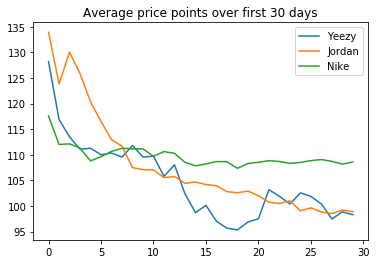

In [291]:
toplot = [[sum(a) / len(a) for a in zip(*[a[:30] for a in x['series']])] for x in each]
for a, name in zip(toplot, cats):
    plt.plot(a, label=name.replace('s', '').title())
plt.legend()
plt.title('Average price points over first 30 days')

Text(0.5,1,'Average price points over all time')

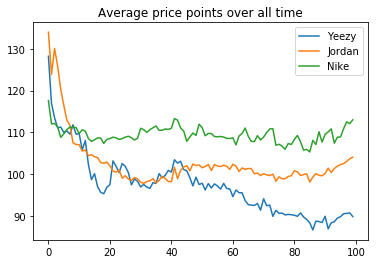

In [292]:
toplot = [[sum(a) / len(a) for a in zip(*[a for a in x['series']])] for x in each]
for a, name in zip(toplot, cats):
    plt.plot(a, label=name.replace('s', '').title())
plt.legend()
plt.title('Average price points over all time')

In [293]:
X, y = [[], []]
for a in df['series']:
    ins, outs = split_sequence(a)
    X += ins
    y += outs
X = array(X)
y = array(y)

In [294]:
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
import numpy as np
from sklearn.model_selection import train_test_split

In [295]:
n_features = 1

X = X.reshape((X.shape[0], X.shape[1], n_features))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=False)
#X_train, X_test = [X[:-500], X[-500:]]
#y_train, y_test = [X[:-500], X[-500:]]
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
#model.compile(optimizer='adam', loss='mse')
model.compile(optimizer='adam', loss='mean_absolute_error')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_13 (LSTM)               (None, 5, 50)             10400     
_________________________________________________________________
lstm_14 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 51        
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
_________________________________________________________________


In [296]:
# fit model
model.fit(X_train, y_train, epochs=15, verbose=True)

Epoch 1/15
15848/15848 [==============================] - 5s 347us/step - loss: 11.3003
Epoch 2/15
15848/15848 [==============================] - 4s 238us/step - loss: 4.8178
Epoch 3/15
15848/15848 [==============================] - 4s 270us/step - loss: 4.9321
Epoch 4/15
15848/15848 [==============================] - 4s 255us/step - loss: 4.8349
Epoch 5/15
15848/15848 [==============================] - 4s 262us/step - loss: 4.7324
Epoch 6/15
15848/15848 [==============================] - 4s 258us/step - loss: 4.7783
Epoch 7/15
15848/15848 [==============================] - 4s 265us/step - loss: 4.7403
Epoch 8/15
15848/15848 [==============================] - 4s 265us/step - loss: 4.6550
Epoch 9/15
15848/15848 [==============================] - 4s 267us/step - loss: 4.6898
Epoch 10/15
15848/15848 [==============================] - 4s 274us/step - loss: 4.6235
Epoch 11/15
15848/15848 [==============================] - 4s 273us/step - loss: 4.6378
Epoch 12/15
15848/15848 [===============

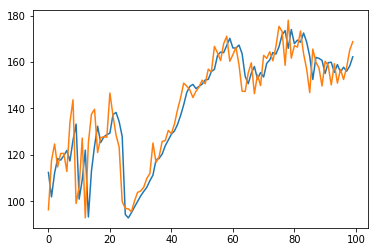

In [297]:
plt.plot(model.predict(X_test)[:100])
plt.plot(y_test[:100])

Text(0.5,1,'Predicted price point over first 50 days')

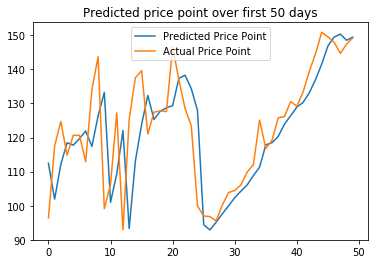

In [298]:
num_days = 50
plt.plot(model.predict(X_test)[:num_days], label = 'Predicted Price Point')
plt.plot(y_test[:num_days], label = 'Actual Price Point')
plt.legend()
plt.title(f'Predicted price point over first {num_days} days')

[Model] Predicting Sequences Multiple...


([[101.333725, 95.518105, 94.69485, 100.491646, 100.76877],
  [77.85241, 78.70627, 78.56789, 78.54171, 78.489265],
  [75.932175, 76.14426, 76.3368, 76.42835, 76.53495],
  [75.57857, 75.81585, 76.053505, 76.139946, 76.259636],
  [76.85697, 76.93472, 76.90244, 76.94789, 76.923256],
  [75.941826, 76.153755, 76.35145, 76.4326, 76.5382],
  [75.31073, 75.45316, 75.62846, 75.68441, 75.77409],
  [72.97308, 73.12192, 73.255646, 73.31961, 73.410225],
  [71.08268, 71.25667, 71.392944, 71.47312, 71.567665],
  [69.34265, 69.47738, 69.61885, 69.661156, 69.75625],
  [68.596176, 68.78014, 69.24608, 69.414215, 69.59577],
  [68.27024, 68.53705, 68.8263, 68.96717, 69.12166],
  [69.178345, 69.47857, 69.69481, 69.83671, 69.94624],
  [68.85805, 68.87287, 68.988335, 68.99407, 69.03606],
  [68.11661, 68.24451, 68.32959, 68.39574, 68.46671],
  [67.35036, 67.44404, 67.84528, 67.97334, 68.09733],
  [67.74901, 68.01669, 68.271225, 68.43655, 68.593056],
  [70.70247, 71.11217, 71.40724, 71.599525, 71.72786],
  [73.

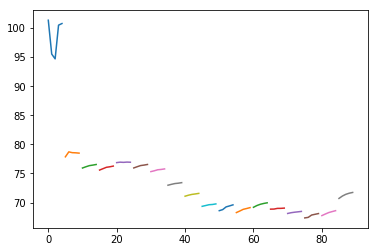

In [326]:
def predict_sequences_multiple(data, window_size, prediction_len):
    #Predict sequence of 50 steps before shifting prediction run forward by 50 steps
    print('[Model] Predicting Sequences Multiple...')
    prediction_seqs = []
    for i in range(int(len(data)/prediction_len)):
        curr_frame = data[i*prediction_len]
        predicted = []
        for j in range(prediction_len):
            predicted.append(model.predict(curr_frame[np.newaxis,:,:])[0,0])
            curr_frame = curr_frame[1:]
            curr_frame = np.insert(curr_frame, [window_size-2], predicted[-1], axis=0)
        prediction_seqs.append(predicted)
    inds = []
    toappend = []
    for i in range(len(prediction_seqs) * len(prediction_seqs[0])):
        if i % prediction_len == 0:
            inds.append(toappend)
            toappend = []
        toappend.append(i)
    inds = inds[1:]
    for x, a in zip(inds, prediction_seqs):
        plt.plot(x, a)#, label = 'Predicted Price Point')
    return prediction_seqs
predict_sequences_multiple(geode_x, 5, 5), len(geode_x)

[Model] Predicting Sequences Multiple...
[Model] Predicting Sequences Multiple...
[Model] Predicting Sequences Multiple...
[Model] Predicting Sequences Multiple...


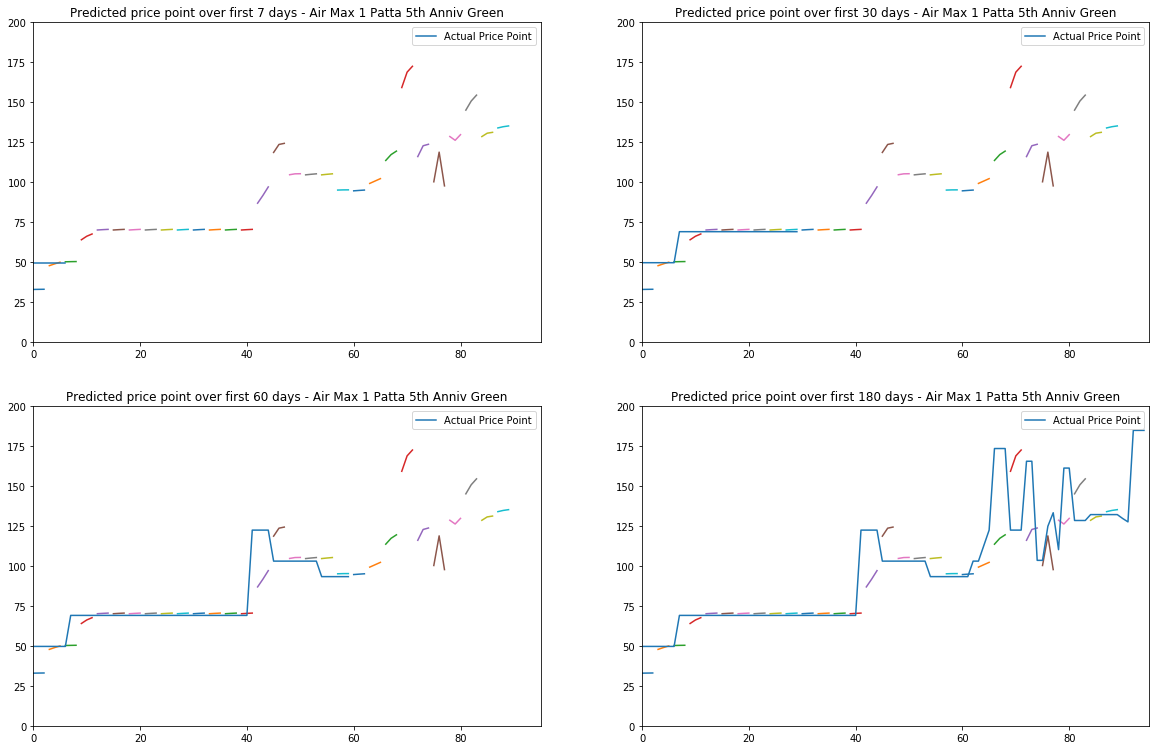

In [361]:
#ind = 11
#touse = df

def plot_time(ind, touse, pred_length=7):
    geode_x, geode_y = split_sequence(list(touse['series'])[ind])
    geode_x = np.array(geode_x)
    geode_y = np.array(geode_y)
    geode_x = geode_x.reshape((geode_x.shape[0], geode_x.shape[1], n_features))

    plt.figure(figsize=(20, 20))

    num_days = 7
    plt.subplot(3, 2, 1)
    predict_sequences_multiple(geode_x, n_steps, pred_length)[:num_days]
    plt.plot(geode_y[:num_days], label = 'Actual Price Point')
    plt.legend()
    plt.axis([0, 95, 0, 200])
    plt.title(f'Predicted price point over first {num_days} days - {list(touse["name"])[ind]}')

    num_days = 30
    plt.subplot(3, 2, 2)
    predict_sequences_multiple(geode_x, n_steps, pred_length)[:num_days]
    plt.plot(geode_y[:num_days], label = 'Actual Price Point')
    plt.legend()
    plt.axis([0, 95, 0, 200])
    plt.title(f'Predicted price point over first {num_days} days - {list(touse["name"])[ind]}')

    num_days = 60
    plt.subplot(3, 2, 3)
    predict_sequences_multiple(geode_x, n_steps, pred_length)[:num_days]
    plt.plot(geode_y[:num_days], label = 'Actual Price Point')
    plt.legend()
    plt.axis([0, 95, 0, 200])
    plt.title(f'Predicted price point over first {num_days} days - {list(touse["name"])[ind]}')

    num_days = 180
    plt.subplot(3, 2, 4)
    predict_sequences_multiple(geode_x, n_steps, pred_length)[:num_days]
    plt.plot(geode_y[:num_days], label = 'Actual Price Point')
    plt.legend()
    plt.axis([0, 95, 0, 200])
    plt.title(f'Predicted price point over first {num_days} days - {list(touse["name"])[ind]}')
plot_time(231, df, pred_length = 3)

[Model] Predicting Sequences Multiple...
[Model] Predicting Sequences Multiple...
[Model] Predicting Sequences Multiple...
[Model] Predicting Sequences Multiple...


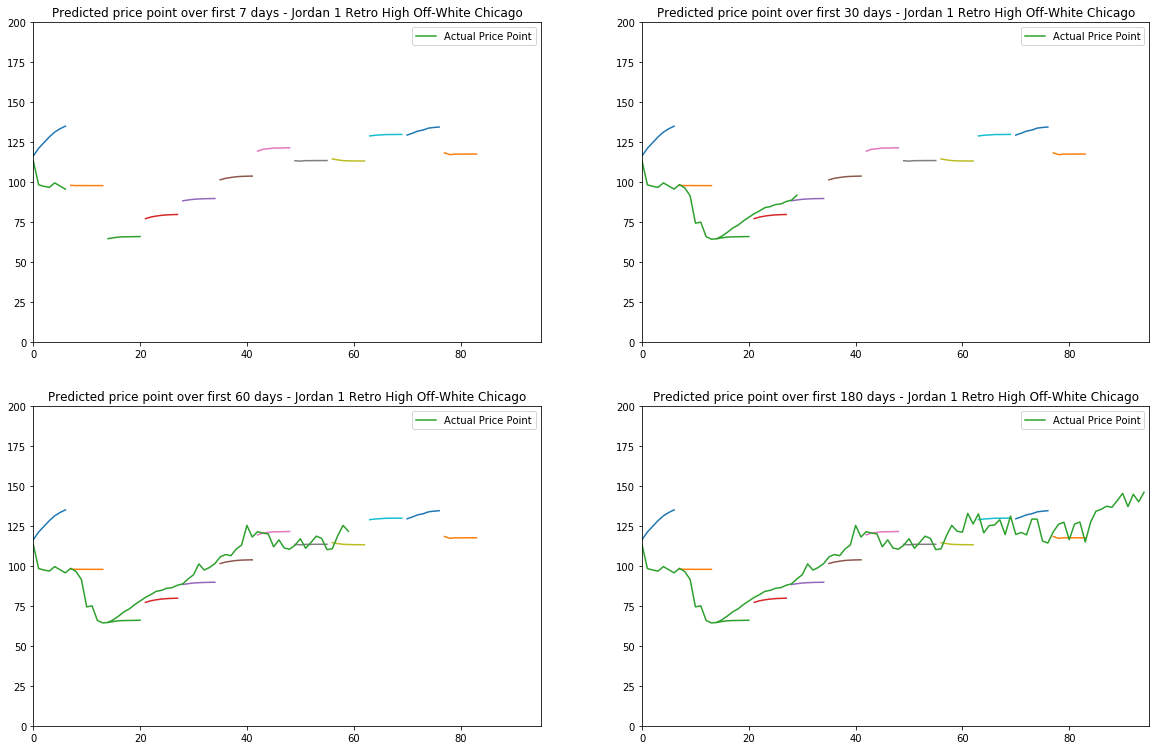

In [352]:
plot_time(44, jordan)

[Model] Predicting Sequences Multiple...
[Model] Predicting Sequences Multiple...
[Model] Predicting Sequences Multiple...
[Model] Predicting Sequences Multiple...


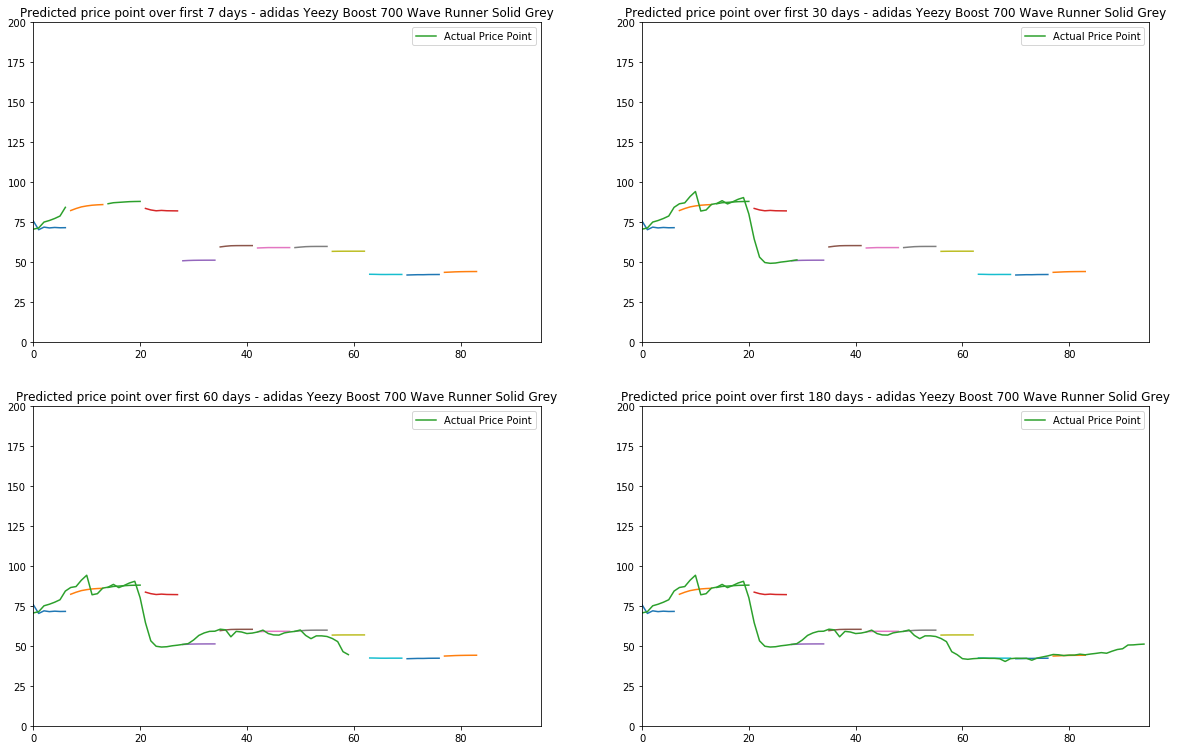

In [353]:
plot_time(8, yeezy)

Text(0.5,1,'Predicted price point over first 180 days - Jordan 1 Retro High Off-White Chicago')

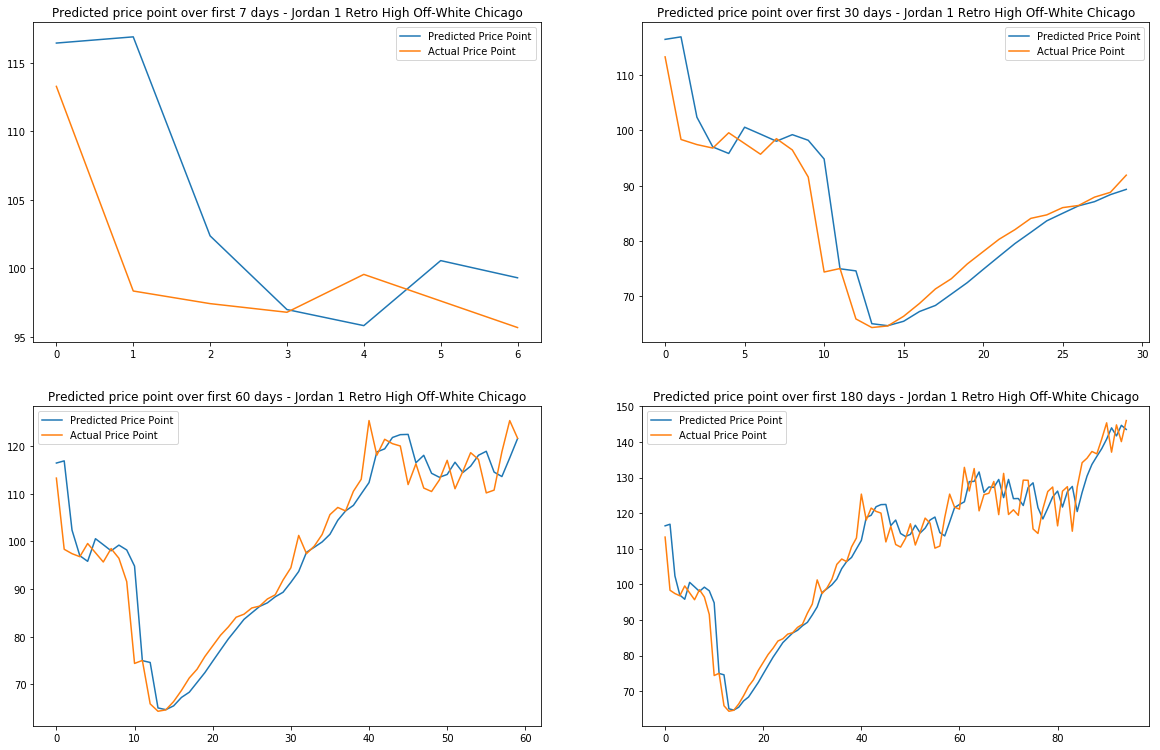

In [331]:
ind = 44
geode_x, geode_y = split_sequence(list(jordan['series'])[ind])
geode_x = np.array(geode_x)
geode_y = np.array(geode_y)
geode_x = geode_x.reshape((geode_x.shape[0], geode_x.shape[1], n_features))

plt.figure(figsize=(20, 20))

num_days = 7
plt.subplot(3, 2, 1)
plt.plot(model.predict(geode_x)[:num_days], label = 'Predicted Price Point')
plt.plot(geode_y[:num_days], label = 'Actual Price Point')
plt.legend()
plt.title(f'Predicted price point over first {num_days} days - {list(jordan["name"])[ind]}')

num_days = 30
plt.subplot(3, 2, 2)
plt.plot(model.predict(geode_x)[:num_days], label = 'Predicted Price Point')
plt.plot(geode_y[:num_days], label = 'Actual Price Point')
plt.legend()
plt.title(f'Predicted price point over first {num_days} days - {list(jordan["name"])[ind]}')

num_days = 60
plt.subplot(3, 2, 3)
plt.plot(model.predict(geode_x)[:num_days], label = 'Predicted Price Point')
plt.plot(geode_y[:num_days], label = 'Actual Price Point')
plt.legend()
plt.title(f'Predicted price point over first {num_days} days - {list(jordan["name"])[ind]}')

num_days = 180
plt.subplot(3, 2, 4)
plt.plot(model.predict(geode_x)[:num_days], label = 'Predicted Price Point')
plt.plot(geode_y[:num_days], label = 'Actual Price Point')
plt.legend()
plt.title(f'Predicted price point over first {num_days} days - {list(jordan["name"])[ind]}')

In [ ]:
ys = []
lim = 5
ind = 30
geode_x, geode_y = split_sequence(np.array(list(df['series'])[ind]).flatten()) #split_sequence(df['series'][30])
geode_x = np.array(geode_x)
geode_y = np.array(geode_y)
geode_x = geode_x.reshape((geode_x.shape[0], geode_x.shape[1], n_features))
l_x = np.array([geode_x[0]])
for i in range(lim):
    l_x = l_x.reshape((l_x.shape[0], l_x.shape[1], n_features))
    l_y = model.predict(l_x)[0][0]# * 200
    l_x = l_x.flatten()
    l_x = np.array([np.append(l_x[1:], l_y)])
    ys.append(l_y)
plt.plot(ys)
plt.plot(geode_y[:lim])

In [ ]:
print(geode_x, geode_y)